In [388]:
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from google_play_scraper import Sort, reviews

import nltk
nltk.download("stopwords")

import emoji
import re
from nltk.corpus import stopwords
from pymystem3 import Mystem
import string 
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm")

pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package stopwords to /Users/nd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/nd/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [389]:
russian_stopwords = ['c', 'а', 'алло', 'без', 'белый', 'близко', 'более', 'больше', 'большой', 'будем', 'будет', 'будете', 'будешь', 'будто', 'буду', 'будут', 'будь', 'бы', 'бывь', 'в', 'вам', 'вами', 'вас', 'ваш', 'ваша', 'ваше', 'ваши', 'вверх', 'вдали', 'вдруг', 'ведь', 'везде', 'весь', 'взять', 'вид', 'вместе', 'вне', 'во', 'вокруг', 'вон', 'вообще', 'восемнадцатый', 'восемнадцать', 'восемь', 'восьмой', 'вот', 'впрочем', 'времени', 'все', 'все', 'еще', 'всегда', 'всего', 'всем', 'всеми', 'всему', 'всех', 'всею', 'всю', 'всюду', 'вся', 'всё', 'второй', 'вы', 'выйти', 'г', 'где', 'главный', 'глаз', 'говорил', 'говорит', 'год', 'года', 'году', 'да', 'давать', 'давно', 'даже', 'далекий', 'далеко', 'дальше', 'даром', 'два', 'двадцатый', 'двадцать', 'две', 'двенадцатый', 'двенадцать', 'двух', 'девятнадцатый', 'девятнадцать', 'девятый', 'девять', 'действительно', 'дел', 'делал', 'делаю', 'дело', 'день', 'деньги', 'десятый', 'десять', 'для', 'до', 'довольно', 'долго', 'должен', 'должно', 'должный', 'другая', 'другие', 'других', 'друго', 'другое', 'другой', 'е', 'его', 'ее', 'ей', 'ему', 'если', 'есть', 'еще', 'ещё', 'ею', 'её', 'ж', 'же', 'жизнь', 'за', 'занят', 'занята', 'занято', 'заняты', 'затем', 'зато', 'зачем', 'здесь', 'знать', 'значит', 'и', 'иди', 'идти', 'из', 'или', 'им', 'имеет', 'имел', 'именно', 'ими', 'иногда', 'их', 'к', 'каждая', 'каждое', 'каждые', 'каждый', 'кажется', 'казаться', 'как', 'какая', 'какой', 'кем', 'книга', 'когда', 'кого', 'ком', 'кому', 'конечно', 'которая', 'которого', 'которой', 'которые', 'который', 'которых', 'кроме', 'кто', 'куда', 'лет', 'ли', 'лицо', 'лишь', 'лучше', 'м', 'маленький', 'мало', 'между', 'меля', 'менее', 'меньше', 'меня', 'мимо', 'мне', 'много', 'многочисленная', 'многочисленное', 'многочисленные', 'многочисленный', 'мной', 'мною', 'мог', 'могу', 'могут', 'мож', 'может', 'можно', 'можхо', 'мои', 'мой', 'мор', 'мочь', 'моя', 'моё', 'мы', 'на', 'наверху', 'над', 'надо', 'назад', 'наиболее', 'найти', 'наконец', 'нам', 'нами', 'нас', 'наш', 'наша', 'наше', 'наши', 'него', 'недавно', 'недалеко', 'нее', 'ней', 'некоторый', 'нельзя', 'нем', 'немного', 'нему', 'непрерывно', 'нередко', 'несколько', 'нет', 'нею', 'неё', 'ни', 'нибудь', 'ниже', 'низко', 'никакой', 'никогда', 'никто', 'никуда', 'ним', 'ними', 'них', 'ничего', 'ничто', 'но', 'новый', 'нога', 'ночь', 'ну', 'нужно', 'нужный', 'нх', 'о', 'об', 'оба', 'обычно', 'один', 'одиннадцатый', 'одиннадцать', 'однажды', 'однако', 'одного', 'одной', 'оказаться', 'окно', 'около', 'он', 'она', 'они', 'оно', 'опять', 'особенно', 'от', 'откуда', 'отовсюду', 'отсюда', 'очень', 'первый', 'перед', 'по', 'под', 'подойди', 'пожалуйста', 'позже', 'пока', 'пор', 'пора', 'после', 'последний', 'посреди', 'потом', 'потому', 'почему', 'почти', 'правда', 'прекрасно', 'при', 'про', 'просто', 'против', 'пятнадцатый', 'пятнадцать', 'пятый', 'пять', 'раз', 'разве', 'рано', 'раньше', 'ряд', 'рядом', 'с', 'с', 'кем', 'сам', 'сама', 'сами', 'самим', 'самими', 'самих', 'само', 'самого', 'самой', 'самом', 'самому', 'саму', 'самый', 'свет', 'свое', 'своего', 'своей', 'свои', 'своих', 'свой', 'свою', 'сделать', 'сеаой', 'себе', 'себя', 'сегодня', 'седьмой', 'сейчас', 'семнадцатый', 'семнадцать', 'семь', 'сих', 'сколько', 'слишком', 'слово', 'сначала', 'снова', 'со', 'собой', 'собою', 'совсем', 'спасибо', 'сразу', 'старый', 'т', 'та', 'так', 'такая', 'также', 'таки', 'такие', 'такое', 'такой', 'там', 'твои', 'твой', 'твоя', 'твоё', 'те', 'тебе', 'тебя', 'тем', 'теми', 'теперь', 'тех', 'то', 'тобой', 'тобою', 'тогда', 'того', 'тоже', 'только', 'том', 'тому', 'тот', 'тою', 'третий', 'три', 'тринадцатый', 'тринадцать', 'ту', 'туда', 'тут', 'ты', 'тысяч', 'у', 'уж', 'уже', 'хороший', 'хорошо', 'хотел', 'бы', 'хотеть', 'хоть', 'хотя', 'хочешь', 'час', 'часто', 'часть', 'чаще', 'чего', 'чем', 'чему', 'через', 'четвертый', 'четыре', 'четырнадцатый', 'четырнадцать', 'что', 'чтоб', 'чтобы', 'чуть', 'шестнадцатый', 'шестнадцать', 'шестой', 'шесть', 'эта', 'эти', 'этим', 'этими', 'этих', 'это', 'этого', 'этой', 'этом', 'этому', 'этот', 'эту', 'я']

Global variables for review scrapping, n-gram enabling and model parameters.

In [424]:
# Variables for review scraping

# Application id from Google Market
application_name = "us.zoom.videomeetings"
scores = [1,2]  # Review scores
count = 500  # The number of reviews
result = []
language = 'ru'  # Review language
country = 'ru'  # Review region

n_grams = False # Use n-grams or not
default_model = False
num_topics = 5 # Number of topics if model is default

eng_words = []
with open('eng_words.txt', 'r') as file:
    eng_words=file.read().splitlines() 
eng_words

for score in scores:
    result_current, continuation_token = reviews(
        application_name,
        lang=language,
        country=country,
        sort=Sort.NEWEST,  # defaults to Sort.MOST_RELEVANT
        count=int(count/len(scores)),  # defaults to 100
        filter_score_with=score  # defaults to None(means all score)
    )
    result.extend(result_current)

Preprocessing methods for Russian and English language. Some adjustments added to a standard pipeline in order to make keywords more precise.

In [425]:
# Create lemmatizer and stopwords list

def preprocess_text_rus(text):
    """
    Removing punctuation and lemmatization.
    """
    text = text.translate(str.maketrans(
        string.punctuation, ' '*len(string.punctuation)))
    tokens = mystem.lemmatize(text.lower())
    tokens = [token.strip() for token in tokens if token not in russian_stopwords
              and token != " " and token not in emoji.UNICODE_EMOJI and token not in eng_words]
    text = " ".join(tokens)
    # Verbs with не are more informative in the case of negative reviews
    text = text.replace('не ', 'не_')

    return text


def preprocessing_text_en(text):
    """
    Removing punctuation and lemmatization.
    """
    text = text.translate(str.maketrans(
        string.punctuation, ' '*len(string.punctuation)))
    tokens = [token.lemma_ for token in nlp(text) if token.lemma_ != '-PRON-']
    tokens = [token.strip()
              for token in tokens if token not in english_stopwords and token not in emoji.UNICODE_EMOJI and token != " "]
    text = " ".join(tokens)
    text = text.replace('not ', 'not_')
    text = text.replace('no ', 'no_')
    return text

Creation of a dataframe with processed and initial review texts and date.

In [426]:
reviews_list = []
date = []
for i in range(len(result)):
    reviews_list.append(result[i]['content'])
    date.append(result[i]['at'])

df = pd.DataFrame(data={'date' : date, 'text' : reviews_list})

df.date = pd.to_datetime(df.date).dt.normalize()

if language == 'ru':
    mystem = Mystem()
#     russian_stopwords = stopwords.words("russian")
#     russian_stopwords.append("это")
#     russian_stopwords.remove("не")
    
    df['text_preproc'] = df.text.apply(preprocess_text_rus)
    
if language == 'en':
    english_stopwords = stopwords.words('english')
    english_stopwords.remove('not')
    english_stopwords.remove('no')
    df['text_preproc'] = df.text.apply(preprocessing_text_en)

df = df[df['text_preproc'].apply(len) > 2].reset_index(drop=True)

Gensim preprocessing which creates lists of tokens.

In [427]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))

data_words = list(sent_to_words(df.text_preproc))

Optionally, n-grams can be added made by Gensim's tools.

In [428]:
if n_grams:
    n_grams_treshold = 30
    n_grams_min_count = 5

    bigram = gensim.models.Phrases(
        data_words, min_count=n_grams_min_count, threshold=n_grams_treshold)
    trigram = gensim.models.Phrases(bigram[data_words], threshold=30)

    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    def make_bigrams(texts):
        return [bigram_mod[doc] for doc in texts]

    def make_trigrams(texts):
        return [trigram_mod[bigram_mod[doc]] for doc in texts]

    data_words = make_bigrams(data_words)
else:
    data_words = data_words

Dictionary and corpus creation

In [429]:
# Create a dictionary from word collection
id2word = corpora.Dictionary(data_words)

# Create a corpus from BoW representation
corpus = [id2word.doc2bow(words) for words in data_words]

Load a Mallet LDA model with a method that find a best model based on coherence value.

In [396]:
mallet_path = 'mallet-2.0.8/bin/mallet'  # Folder path with Mallet


def compute_coherence_values(dictionary, corpus, texts, maximum, start=2, step=3):
    """
    Compute coherences for different topic number variations to find the best one

    Returns:
    model_list - list of models for the given topic number range
    coh_values - values of coherences for these models
    """
    coh_values = []
    model_list = []
    for num_topics in range(start, maximum, step):
        model = gensim.models.wrappers.LdaMallet(
            mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coh_values.append(coherencemodel.get_coherence())

    return model_list, coh_values

It's seen that the biggest coherence score is for 9 topics, but let's take a look at PCA representation of the topics

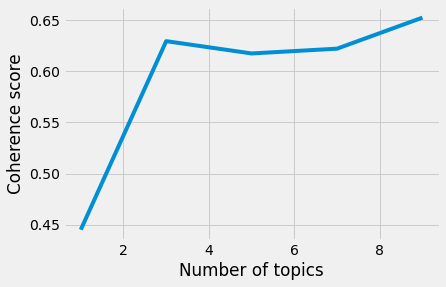

In [397]:
# If the default model is set it's going to be the one with selected topic numbers.

if default_model:
    best_model = gensim.models.wrappers.LdaMallet(
        mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
else:
    # Values for finding the best model
    start = 1
    maximum = 10
    step = 2

    model_list, coh_values = compute_coherence_values(
        dictionary=id2word, corpus=corpus, texts=data_words, start=start, maximum=maximum, step=step)

    best_model_index = coh_values.index(max(coh_values))
    best_model = model_list[best_model_index]

    x = range(start, maximum, step)
    plt.plot(x, coh_values)
    plt.xlabel("Number of topics")
    plt.ylabel("Coherence score")
    plt.show()

The following list demonstrates topics and main keywords for each of them.

In [430]:
# Show Topics
pprint(best_model.show_topics())

[(0,
  '0.048*"быть" + 0.048*"писать" + 0.043*"пароль" + 0.043*"телефон" + '
  '0.030*"версия" + 0.022*"app" + 0.017*"видео" + 0.017*"кнопка" + '
  '0.017*"андроид" + 0.017*"отменять"'),
 (1,
  '0.133*"конференция" + 0.027*"не_зайти" + 0.027*"время" + 0.024*"обновление" '
  '+ 0.024*"зайти" + 0.024*"плохой" + 0.020*"нормально" + 0.016*"пользоваться" '
  '+ 0.016*"регистрация" + 0.016*"плохо"'),
 (2,
  '0.043*"программа" + 0.043*"русский" + 0.034*"не_работать" + '
  '0.034*"невозможно" + 0.030*"не_" + 0.026*"не_слышать" + 0.021*"не_понятно" '
  '+ 0.021*"человек" + 0.021*"группа" + 0.017*"планшет"'),
 (3,
  '0.231*"звук" + 0.034*"ошибка" + 0.029*"проблема" + 0.025*"не_скачиваться" + '
  '0.025*"видеть" + 0.025*"микрофон" + 0.021*"отвечать" + 0.021*"чат" + '
  '0.021*"скачать" + 0.017*"ужасный"'),
 (4,
  '0.181*"приложение" + 0.048*"не_работать" + 0.044*"работать" + 0.033*"язык" '
  '+ 0.030*"связь" + 0.018*"исправлять" + 0.018*"подписка" + 0.018*"включать" '
  '+ 0.015*"списывать" + 0.0

Despite of the coherence score, it's obvious from the LDA visualization that some of the topics are quite close and have intersection. It seems that the optimal number of topics is about 5.

In [399]:
pyLDAvis_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(
    best_model)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(pyLDAvis_model, corpus, id2word)
vis

/Users/nd/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Users/nd/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Users/nd/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.300050 -0.108965  1       1        11.734322
4      0.056712  0.171038  2       1        11.470155
2      0.131128  0.238750  3       1        11.140597
6     -0.320853 -0.079941  4       1        11.095989
3      0.195191 -0.230578  5       1        11.084348
5      0.209767 -0.265562  6       1        11.010056
8     -0.084111  0.087721  7       1        10.958558
7      0.032761  0.131931  8       1        10.845571
0      0.079455  0.055606  9       1        10.660403, topic_info=              Term       Freq      Total Category  logprob  loglift
0    звук           49.000000  49.000000  Default  30.0000  30.0000
15   приложение     47.000000  47.000000  Default  29.0000  29.0000
16   конференция    34.000000  34.000000  Default  28.0000  28.0000
1    не_работать    19.000000  19.000000  Default  27.0000  27.0000
50   телефон        12.000000  12.000000  Default  26.0000  26.0000
..       ...              ...        ...      ...      ...      ...
563  коллега        1.179367   1.179367   Topic9  -4.7095   2.2386 
207  пытаться       1.179367   3.074960   Topic9  -4.7095   1.2803 
619  казахстан      1.179367   2.185298   Topic9  -4.7095   1.6219 
311  читать         1.179367   2.185464   Topic9  -4.7095   1.6218 
122  здравствовать  1.179367   2.185298   Topic9  -4.7095   1.6219 

[525 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
71    4      0.990762  app        
72    6      1.124231  elements   
549   5      1.094656  gt         
592   2      0.993940  headphones 
354   3      0.994105  instalation
...  ..           ...         ... 
31    2      0.993940  шифрование 
518   2      0.993940  экран      
120   3      0.994105  язык       
461   5      1.094656  אפשר       
462   8      0.893503  להוריד     

[533 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 7, 4, 6, 9, 8, 1])

Try a new model with 5 topics.

In [400]:
best_model = gensim.models.wrappers.LdaMallet(
        mallet_path, corpus=corpus, num_topics=5, id2word=id2word)

In [401]:
# Show Topics
pprint(best_model.show_topics())

[(0,
  '0.048*"быть" + 0.048*"писать" + 0.043*"пароль" + 0.043*"телефон" + '
  '0.030*"версия" + 0.022*"app" + 0.017*"видео" + 0.017*"кнопка" + '
  '0.017*"андроид" + 0.017*"отменять"'),
 (1,
  '0.133*"конференция" + 0.027*"не_зайти" + 0.027*"время" + 0.024*"обновление" '
  '+ 0.024*"зайти" + 0.024*"плохой" + 0.020*"нормально" + 0.016*"пользоваться" '
  '+ 0.016*"регистрация" + 0.016*"плохо"'),
 (2,
  '0.043*"программа" + 0.043*"русский" + 0.034*"не_работать" + '
  '0.034*"невозможно" + 0.030*"не_" + 0.026*"не_слышать" + 0.021*"не_понятно" '
  '+ 0.021*"человек" + 0.021*"группа" + 0.017*"планшет"'),
 (3,
  '0.231*"звук" + 0.034*"ошибка" + 0.029*"проблема" + 0.025*"не_скачиваться" + '
  '0.025*"видеть" + 0.025*"микрофон" + 0.021*"отвечать" + 0.021*"чат" + '
  '0.021*"скачать" + 0.017*"ужасный"'),
 (4,
  '0.181*"приложение" + 0.048*"не_работать" + 0.044*"работать" + 0.033*"язык" '
  '+ 0.030*"связь" + 0.018*"исправлять" + 0.018*"подписка" + 0.018*"включать" '
  '+ 0.015*"списывать" + 0.0

The LDA visualization for 5 topics shows more distinctive categories.

In [402]:
pyLDAvis_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(
    best_model)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(pyLDAvis_model, corpus, id2word)
vis

/Users/nd/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Users/nd/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Users/nd/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.206493  0.103394  1       1        20.657147
1     -0.236182 -0.263215  2       1        20.076969
0     -0.154099 -0.051579  3       1        20.068821
2      0.315254 -0.142535  4       1        19.619581
3     -0.131466  0.353935  5       1        19.577483, topic_info=            Term       Freq      Total Category  logprob  loglift
0    звук         55.000000  55.000000  Default  30.0000  30.0000
15   приложение   45.000000  45.000000  Default  29.0000  29.0000
16   конференция  32.000000  32.000000  Default  28.0000  28.0000
109  писать       11.000000  11.000000  Default  27.0000  27.0000
145  быть         11.000000  11.000000  Default  26.0000  26.0000
..    ...               ...        ...      ...      ...      ...
448  не_пускать   1.010132   1.010132   Topic5  -5.4723   1.6308 
315  видео        2.020265   6.287713   Topic5  -4.7791   0.4954 
205  собрание     1.010132   1.010132   Topic5  -5.4723   1.6308 
567  происходить  1.010132   1.010132   Topic5  -5.4723   1.6308 
561  добавлять    1.010132   1.010132   Topic5  -5.4723   1.6308 

[346 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
71    3      0.937328  app       
592   5      0.989969  headphones
278   3      0.937328  internet  
279   4      0.967092  ipad      
280   4      0.967092  lags      
...  ..           ...   ...      
399   4      0.967092  честно    
311   4      0.967092  читать    
31    4      0.967092  шифрование
518   2      1.034293  экран     
120   1      0.949616  язык      

[330 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 3, 4])

In [403]:
data = df.text_preproc.values.tolist()


def keyword_review_merge(ldamodel=best_model, corpus=corpus, texts=data):
    # Init output
    topic_per_review_df = pd.DataFrame()

    # Find a topic for each review with the biggest percentage contribution
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        topic_num = row[0][0]
        prop_topic = row[0][1]
        # Get keywords for the topic
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        topic_per_review_df = topic_per_review_df.append(pd.Series(
            [int(topic_num), round(prop_topic, 4), topic_keywords]), ignore_index=True)
    topic_per_review_df.columns = ['dominant_topic',
                                   'perc_contribution', 'keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    topic_per_review_df = pd.concat([topic_per_review_df, contents], axis=1)
    return(topic_per_review_df)


review_with_topic_info_df = keyword_review_merge(
    ldamodel=best_model, corpus=corpus, texts=data)
review_with_topic_info_df.columns = [
    'dominant_topic', 'perc_contribution', 'keywords', 'text_preproc']


# Add non-lemmatized text instead of preprocessed
review_with_topic_info_df = review_with_topic_info_df.merge(
    df, right_index=True, left_index=True, how='left').drop(columns=['text_preproc_x', 'text_preproc_y'])
review_with_topic_info_df.sample(10)

,dominant_topic,perc_contribution,keywords,date,text
146,2.0,0.2115,"программа, русский, не_работать, невозможно, не_, не_слышать, не_понятно, человек, группа, планшет",2015-04-11,Не понятно как это работает
62,3.0,0.2321,"звук, ошибка, проблема, не_скачиваться, видеть, микрофон, отвечать, чат, скачать, ужасный",2019-10-02,У меня не работает звук и микрофон ( все права разрешены. Не включается
71,3.0,0.2556,"звук, ошибка, проблема, не_скачиваться, видеть, микрофон, отвечать, чат, скачать, ужасный",2019-09-09,"Программа - г***но! Понадобилось связаться с банком, они почему-то только через нее работают. В итоге я оператора вижу, она меня тоже, а звука не у нее, ни у меня нет! На динамике красный крест, который не убрать! Сделал все разрешения, все доступы, и ни хрена! Хотя в вотсап и вайбер у меня все прекрасно работает!"
149,1.0,0.2157,"конференция, не_зайти, время, обновление, зайти, плохой, нормально, пользоваться, регистрация, плохо",2014-08-15,Фууу
93,0.0,0.2315,"быть, писать, пароль, телефон, версия, app, видео, кнопка, андроид, отменять",2019-05-07,"Связь между Москвой и Питером будто между альфой центаврой и Плутоном. в чем дело - не понятно, причем только в этом приложении и только с видео."
86,3.0,0.2392,"звук, ошибка, проблема, не_скачиваться, видеть, микрофон, отвечать, чат, скачать, ужасный",2019-06-15,"не работает микрофон если откл общий звук,микрофон включается. оптимизируйте приложение"
116,0.0,0.2115,"быть, писать, пароль, телефон, версия, app, видео, кнопка, андроид, отменять",2018-09-25,"Конченное приложение, не регистрирует."
44,4.0,0.2661,"приложение, не_работать, работать, язык, связь, исправлять, подписка, включать, списывать, непонятный",2019-11-17,"Вчера была разочарована приложением. Я месяц назад оплачивала конференции на 1 за 14,99$. Нужно было протестить работу приложения. Вчера приложение повторно, без моего запроса списали с меня принудительно 14,99$, хотя я не собиралась покупать в этом месяце вебинары. ЧТО ЭТО? МАЛО ТОГО, ЧТО ВЫ ЗАПОМНИЛИ У СЕБЯ МОЙ СV, ТАК ЕЩЕ И СПИСАЛИ СРЕДСТВА БЕЗ МОЕГО СОГЛАСИЯ!"
76,3.0,0.2585,"звук, ошибка, проблема, не_скачиваться, видеть, микрофон, отвечать, чат, скачать, ужасный",2019-07-18,"очень много ошибок в приложении, звук часто подвисает, не принимает вызовы при свернутом приложении. Написал в форму обратной связи на сайте, на часть проблем забрали логи, на некоторые не ответили совсем. в десктопном linux приложении еще больше ошибок чем в мобильном, по ним ответили что пока не собираются его развивать. Вышло обновление, баги остались. Отзывы не чмтают, стандартные отписки. Про уязвимости безопасности приложения читайте на медузе, там ворох проблем нашли"
95,0.0,0.2487,"быть, писать, пароль, телефон, версия, app, видео, кнопка, андроид, отменять",2019-04-29,"На телефоне не зайти по паролю,пишет не правильно,хотя ввожу всё верно.Пытаюсь изменить пароль,не даёт....на планшете работает."


In [404]:
topics = review_with_topic_info_df['dominant_topic'].value_counts().keys()

number_of_reviews = 3
top_reviews = []

for topic in sorted(topics):
    top_reviews.append(review_with_topic_info_df[review_with_topic_info_df.dominant_topic == topic].sort_values(
        'perc_contribution', ascending=False)[:number_of_reviews])

top_reviews_by_topic_df = pd.concat(top_reviews)
top_reviews_by_topic_df

,dominant_topic,perc_contribution,keywords,date,text
188,0.0,0.2542,"быть, писать, пароль, телефон, версия, app, видео, кнопка, андроид, отменять",2018-04-24,"Последние дни томозили смс, а со вчерашнего дня вообще ничего не грузит, и \nпосле долгого зависание при входе пишет ошибка 5003"
95,0.0,0.2487,"быть, писать, пароль, телефон, версия, app, видео, кнопка, андроид, отменять",2019-04-29,"На телефоне не зайти по паролю,пишет не правильно,хотя ввожу всё верно.Пытаюсь изменить пароль,не даёт....на планшете работает."
15,0.0,0.2433,"быть, писать, пароль, телефон, версия, app, видео, кнопка, андроид, отменять",2020-02-27,"By default, user interface is translated to my native language. However, quality of translation is extremely low. Some elements are just gibberish and some phrases indeed have the opposite meaning. For example, it writes 'User is kept' instead of 'User left'. Current localization makes UX awful. I did not manage to turn speakers on and so the app was useless for me."
37,1.0,0.2517,"конференция, не_зайти, время, обновление, зайти, плохой, нормально, пользоваться, регистрация, плохо",2019-12-07,"Отвратительное качество связи и неудобное приложение. Невозможно подключиться к конференции, если организатор ещё не подключился и не начал её. Невозможность работать просто в браузере по ссылке. Есть гораздо более удобные и надёжные решения. Стабильно глючит при входе: то можно зайти без логина, то нельзя. В самые важные моменты не может подключиться к конференции. Вынужден пользоваться т.к. купили на работе."
40,1.0,0.2469,"конференция, не_зайти, время, обновление, зайти, плохой, нормально, пользоваться, регистрация, плохо",2019-11-27,"Дорогие разработчики! Я установила вчера это приложение, а оно оооочень плохо работает...точнее, при попытке зайти, приложение вылетает...Я телефон даже перезагрузила 2 раза, а оно не хочет работать...Потом я всё же еле-еле смогла добиться включения...а теперь я опять не могу зайти:("
186,1.0,0.2453,"конференция, не_зайти, время, обновление, зайти, плохой, нормально, пользоваться, регистрация, плохо",2018-04-27,Не могу зайти в зум который день! А у меня там конференции!
167,2.0,0.2716,"программа, русский, не_работать, невозможно, не_, не_слышать, не_понятно, человек, группа, планшет",2019-07-02,"Звука нет. Упд. Звук нашелся после 15 минут танцев с бубнами. Настройки в мобильной версии так и не нашла (для тестирования микрофона и динамиков). Переключаться между конференцией, списком участников и чатом неудобно ОЧЕНЬ. Мобильная версия очень странная и неудобная, интуитивно-непонятный интерфейс вкупе с отсутствием возможности настроек."
179,2.0,0.2588,"программа, русский, не_работать, невозможно, не_, не_слышать, не_понятно, человек, группа, планшет",2018-12-18,"блютуз гарнитура включается по праздникам и каким то шаманством, почему то во время звонка иконка с динамиком может иметь одно из двух значений - либо динамик и блютуз, либо динамик и on, в чем между ними разница совершенно непонятно . обычно если нажать туда два раза, то начинает работать гарнитура, но это не всегда работает. Зачем нужно приложение, если звонить через него нормально невозможно, я не знаю, чат в нем совершенно убогий :("
79,2.0,0.2486,"программа, русский, не_работать, невозможно, не_, не_слышать, не_понятно, человек, группа, планшет",2019-07-05,пожалуйста сделайте бесплатно без мб срочно нужно спасибо за понимание. извините я по англискому не понимаю на русском можете сказать что вы хотите
76,3.0,0.2585,"звук, ошибка, проблема, не_скачиваться, видеть, микрофон, отвечать, чат, скачать, ужасный",2019-07-18,"очень много ошибок в приложении, звук часто подвисает, не принимает вызовы при свернутом приложении. Написал в форму обратной связи на сайте, на часть проблем забрали логи, на некоторые не ответили совсем. в десктопном linux приложении еще больше ошибок чем в мобильном, по ним ответили что пока не собираются его развивать. Вышло обновление, баги остались. Отзывы не чмтают, стандартные отписки. Про уязвимости безопас